# 5. 인공신경망

### 5.1 다층 퍼셉트론

#### 5.1.1 선형회귀

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)

In [6]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1,bias = True) # 선형 회귀식

    def forward(self, x): # 실제 입력값이 들어와 연산이 진행 하는 순서와 방법을 정하는 곳
        y = self.fc(x) # x값을 받아 y값을 반환

        return y 

In [7]:
model = LinearRegression()
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [8]:
loss_stack =[]
for epoch in range(1001):

    optimizer.zero_grad()

    y_hat = model(x)
    loss = criterion(y_hat,y)

    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())

    if epoch % 100 == 0:
        print(f'Epoch {epoch} : {loss.item()}')

Epoch 0 : 8.4336519241333
Epoch 100 : 0.6475235223770142
Epoch 200 : 0.11954130977392197
Epoch 300 : 0.08041207492351532
Epoch 400 : 0.07458341866731644
Epoch 500 : 0.07135498523712158
Epoch 600 : 0.06862087547779083
Epoch 700 : 0.06620331108570099
Epoch 800 : 0.06405848264694214
Epoch 900 : 0.06215493753552437
Epoch 1000 : 0.060465842485427856


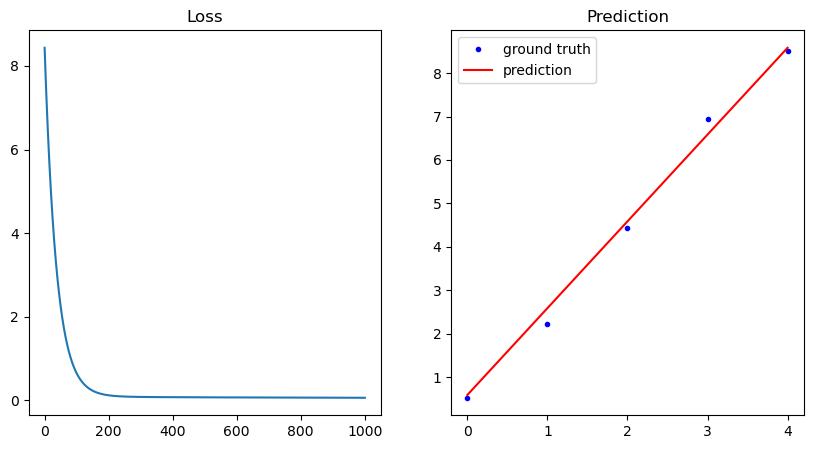

In [9]:
with torch.no_grad(): # requires_grad를 비활성화
    y_hat = model(x)


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title('Prediction')
plt.show()

### 5.2 활성화 함수

- 비선형적인 층 사이의 관계를 표현
- 이전 노드의 값과 가중치가 계산된 값을 활성화 함수에 넣어 계산한 뒤 다음 노드로 보냄

In [ ]:
#### 시그모이드 함수
# 0과 1사이로 변환
# 이진 분류 문제에서 활용
torch.sigmoid()
nn.Sigmoid()


#### tanh 함수
# -1과 1 사이의 값을 취함
# 시그모이드 함수보다 더 가파른 기울기를 가짐
torch.tanh()
nn.Tanh()


#### ReU 함수
# 계산이 쉽고 미분도 쉽게 풀 수 있음
# 선형적 성질들을 보존하고 있어 최적화를 쉽게 할 수 있게 함
torch.nn.functional.relu()
nn.ReLU()


#### Softmax 함수
# 벡터 형태로 예측값이 나오는 다중 분류문제에서 사용
torch.nn.functional.softmax() 
nn.Softmax()
s

### 5.3 손실 함수

In [ ]:
#### MAE
# 유사도, 거리 측정, 회귀 문제등에 많이 사용
torch.nn.L1Loss

#### MSE
# 유사도, 거리 측정, 회귀 문제등에 많이 사용
torch.nn.MSELoss

#### Cross Entropy Loss
# 다중 분류 문제에서 사용
torch.nn.CrossEntropyLoss

### 5.4 최적화 기법

In [ ]:
#### 확률적 경사하강법 
# 데이터를 나눠서 학습하는 방법
# 미니 배치를 나눌 때 데이터를 무작위로 섞어서 나눔
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

#### momentum 방법
# SGD 함수에 momentum 지수를 넣어준다.
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

#### Adam 방법
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)

#### 5.4.3 스케쥴링
- 가변 학습률을 사용할 때 학습률이 어떻게 바뀌는지 규칙을 정해주는 것

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size =30, gamma =0.1) # 30번 학습마다 0,1배씩 줄여주고 싶을 때

## 중략 ##


for epoch in range(400):
    running_loss = 0.0
    for data in trainloader:
        inputs, values = data 
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, values)
        loss.backward()
        optimizer.step()

## 중략 ##

    scheduler.step()

#### 5.4.4 MADGRAD
- 모먼텀과 가변식 방법을 병행하는 최신 최적화 기법

In [ ]:
pip install madgrad # 설치

import madgrad
optimizer = madgrad.MADGRAD(model.parameters())

### 5.5 교차 검증

In [ ]:
# 교차검증을 이용한 학습 및 평가

validation_loss = []
for fold, (train_idx, val_idx) in enumerate(kfold.split(trainset)): # 나눠진 학습 데이터의 인덱스를 불러온다.

    train_subsampler = torch.utils.data.SubsetRandomSapler(train_idx)
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size = 32, sampler = train_subsampler)
    valloader = torch.utils.data.DataLoader(trainset, batch_size =32, sampler = val_subsampler)

    model = Regressor()
    optimizer = torch.optim.Adam(model.parameters(), lr= 0.01, weight_decay = 1e-7)

    for epoch in range(400):
        for data in trainloader:
            inputs, values = data
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, values)
            loss.backward()
            optimizer.step()

    train_rmse = evaluation(trainloader)
    val_rmse = evaluation(valloader)
    print("k-fold", fold, "train loss: %.4f, validation loss: %.4f" % (train_rmse, val_rmse))
    validation_loss.append(val_rmse)



### 5.6 모델 구조 및 가중치 확인

#### 5.6.1 모델 구조

In [ ]:
import torch
from torchsummary import summary

summary(model,(10,13))

#### 5.6.2 모델 변수

In [ ]:
for parameter in model.parameters():
    print(parameter.size())

for name, param in model.named_parameters():
    print(name, param.size())